### Depedencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import datetime
from textblob import TextBlob
import numpy as np
import pandas as pd

# Sentiment Analysis

References:
- [Beginner NLP Product Sentiment Analysis - TextBlob](https://www.kaggle.com/code/blessondensil294/beginner-nlp-product-sentiment-analysis-textblob)

### Load Dataset

In [3]:
df = pd.read_csv("../data/reviews_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   processed_review  4802 non-null   object
dtypes: object(1)
memory usage: 37.6+ KB


### Analyze the Sentiments

In [5]:
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment
    return sentiment.polarity, sentiment.subjectivity

df[['polarity', 'subjectivity']] = df['processed_review'].apply(lambda x: pd.Series(get_sentiment(x)))

### Categorize Reviews

In [7]:
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['polarity'].apply(categorize_sentiment)
df.head()

,processed_review,polarity,subjectivity,sentiment_label
0,life short even bother someone live thousand y...,0.042143,0.422183,neutral
1,feel catered feel like eternity since give phe...,0.184917,0.500797,positive
2,style frieren not_have unique style way feel l...,-0.028401,0.559785,neutral
3,tldr not_recommend anyone standard enjoy fanta...,0.058285,0.449768,neutral
4,episode frieren appear unique masterpiece stor...,0.130950,0.480398,positive


### CloudWords

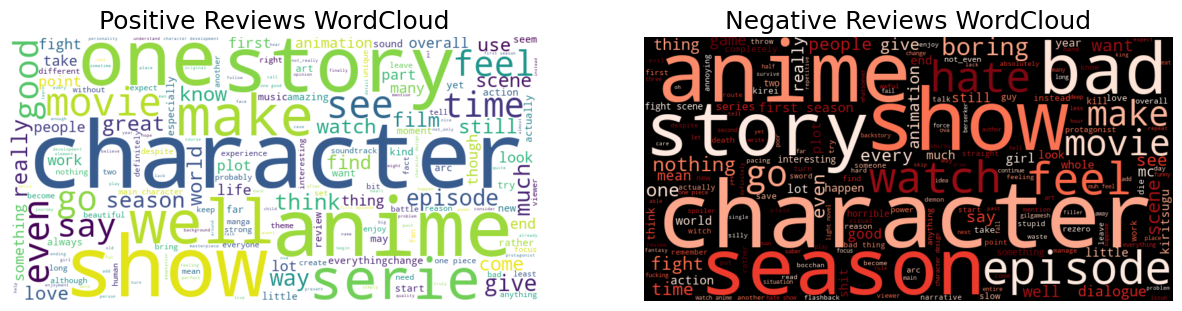

In [17]:
positive_text = " ".join(df[df['sentiment_label'] == 'positive']['processed_review'].dropna())
negative_text = " ".join(df[df['sentiment_label'] == 'negative']['processed_review'].dropna())

positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title("Positive Reviews WordCloud", fontsize=18)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title("Negative Reviews WordCloud", fontsize=18)
plt.axis('off')
plt.show()